In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline

kegg = pd.read_csv('datasets/KEGG/ReactionNetworkU.csv')


In [29]:
kegg.head()

,Pathway,Connected_Components_Integer,Diameter,Radius,Centralization,Shortest_Path,Characteristic_Path_Length,Avg.num.Neighbours,Density,Heterogeneity,...,TopologicalCoefficient,BetweennessCentrality,Radiality,Eccentricity,NumberOfUndirectedEdges,ClosenessCentrality,AverageShortestPathLength,ClusteringCoefficient,nodeCount,edgeCount
0,aac00010,1,15,8,0.086580087,506,5.905138,2.260870,0.102767,0.350401,...,0.423671,0.233578,0.672991,11.739130,0.0,0.175792,5.905138,0.181159,23,44
1,aac00020,1,7,5,0.091503268,342,3.309942,2.526316,0.140351,0.324091,...,0.442857,0.135879,0.670008,5.789474,0.0,0.307019,3.309942,0.070175,19,44
2,aac00030,2,8,1,0.177489177,386,3.191710,2.434783,0.110672,0.683255,...,0.264447,0.150775,0.736842,5.478261,0.0,0.387645,2.974828,0.124638,23,56
3,aac00040,5,5,1,0.087719298,92,2.304348,1.500000,0.078947,0.447214,...,0.183333,0.184762,0.794286,2.900000,0.0,0.616221,1.948571,0.000000,20,26
4,aac00051,2,5,1,0.196969697,112,2.446429,2.000000,0.166667,0.554700,...,0.270192,0.138462,0.750769,3.538462,0.0,0.509972,2.246154,0.000000,13,22


In [34]:
kegg["Number_of_Self_Loops"].unique()

array([0, 1, 3, 2, 4])

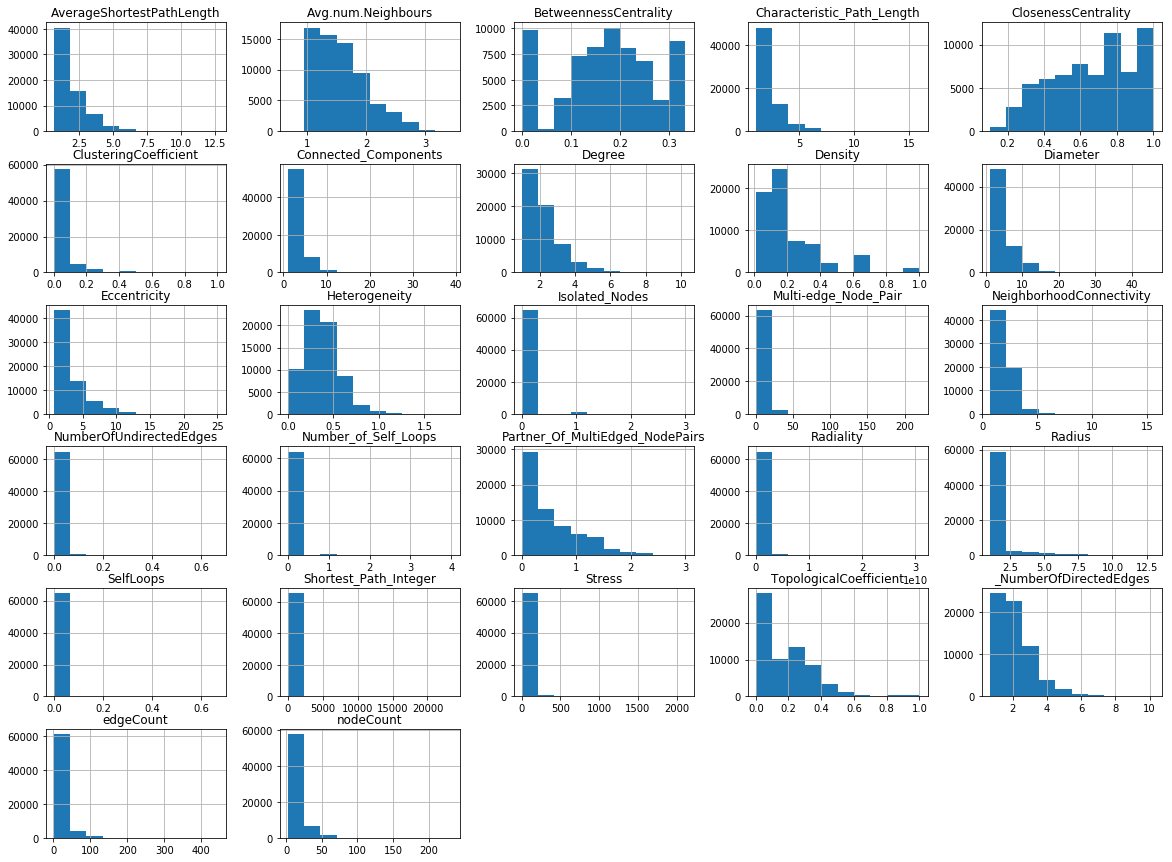

In [11]:
kegg.hist(bins=10, figsize=(20,15))
plt.show()

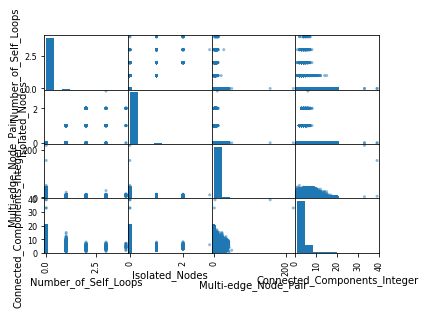

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(kegg[["Number_of_Self_Loops","Isolated_Nodes","Multi-edge_Node_Pair","Connected_Components_Integer"]])
plt.show()

In [39]:
def isolated(x):
    if x>0:
        return 1
    return 0
    
kegg["I_Node"] =  kegg["Isolated_Nodes"].apply(isolated)

### Split data into a test and a training set
#### make sure that all classification types are represnted in the same ratios

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(kegg, kegg["I_Node"]):
    strat_train_set = kegg.loc[train_index]
    strat_test_set = kegg.loc[test_index]

In [41]:
strat_train_set.to_csv("datasets/KEGG/kegg_train.csv",index=False)
strat_test_set.to_csv("datasets/KEGG/kegg_test.csv",index=False)

In [42]:
strat_test_set['I_Node'].value_counts()

0    12911
1      200
Name: I_Node, dtype: int64

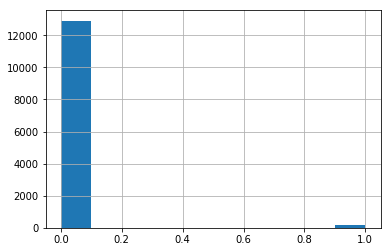

In [43]:
strat_test_set['I_Node'].hist()